In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from glob import glob
import numpy as np

In [3]:
tests = glob("*.out")
tests = [i[:-4] for i in tests]
# sizes of tests
x = []
# dense ddpcm full time
y = []
# dense matvecs with r_eps
y_eps = []
# energy, cmputed by dense ddpcm
y_en = []
# fmm ddpcm full time
z = []
# fmm matvecs with r_eps
z_eps = []
# energy, computed by fmm pcm
z_en = []
# get data
for t in tests:
    with open(t+".inp") as fd:
        lines = fd.readlines()
    x.append(int(lines[0]))
    with open(t+".out") as fd:
        lines = fd.readlines()
    y_eps.append(float(lines[0].split()[-1]))
    y_en.append(float(lines[1].split()[-1]))
    y.append(float(lines[2].split()[-1]))
    with open(t+".fmm") as fd:
        lines = fd.readlines()
    z_eps.append(float(lines[0].split()[-1]))
    z_en.append(float(lines[1].split()[-1]))
    z.append(float(lines[2].split()[-1]))
#print(x)
order = np.argsort(x)
x = np.array(x)[order]
y = np.array(y)[order]
y_eps = np.array(y_eps)[order]
y_en = np.array(y_en)[order]
z = np.array(z)[order]
z_eps = np.array(z_eps)[order]
z_en = np.array(z_en)[order]

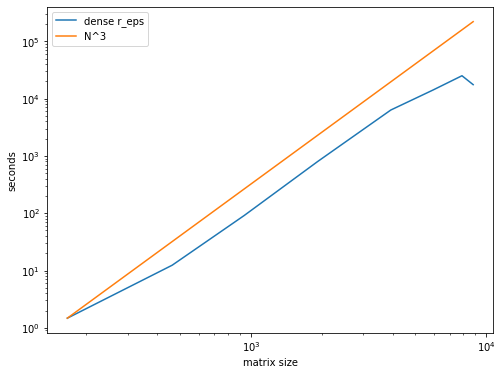

In [4]:
fig = plt.figure(figsize=(8,6))
plt.loglog(x, y_eps, label="dense r_eps")
#plt.loglog(x, z_eps, label="fmm r_eps")
plt.loglog(x, x**3/x[0]**3*y_eps[0], label="N^3")
#plt.loglog(x, x**2*np.log(x)/x[0]**2/np.log(x[0])*z_eps[0], label="N^2 logN")
plt.legend()
plt.xlabel("matrix size")
plt.ylabel("seconds")
plt.savefig("dense.pdf")

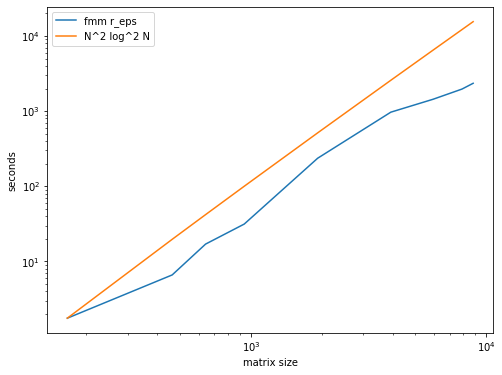

In [8]:
fig = plt.figure(figsize=(8,6))
#plt.loglog(x, y_eps, label="dense r_eps")
plt.loglog(x, z_eps, label="fmm r_eps")
#plt.loglog(x, x**3/x[0]**3*y_eps[0], label="N^3")
plt.loglog(x, x**2*np.log(x)**2/x[0]**2/np.log(x[0])**2*z_eps[0], label="N^2 log^2 N")
plt.legend()
plt.xlabel("matrix size")
plt.ylabel("seconds")
plt.savefig("fmm.pdf")

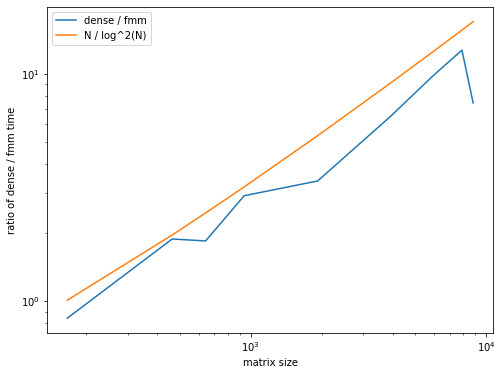

In [6]:
fig = plt.figure(figsize=(8,6))
plt.loglog(x, y_eps/z_eps, label="dense / fmm")
plt.loglog(x, 1.2*x/np.log(x)**2/x[0]*np.log(x[0])**2*y_eps[0]/z_eps[0], label="N / log^2(N)")
plt.xlabel("matrix size")
plt.ylabel("ratio of dense / fmm time")
plt.legend()
plt.savefig("diff.pdf")